#Importing Relevant Libraries

In [1]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## Uploading the dataset


In [2]:
df = pd.read_csv('dataset.csv', encoding='latin-1')
df.head()

,Track,Album Name,Artist,Release Date,ISRC,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,...,SiriusXM Spins,Deezer Playlist Count,Deezer Playlist Reach,Amazon Playlist Count,Pandora Streams,Pandora Track Stations,Soundcloud Streams,Shazam Counts,TIDAL Popularity,Explicit Track
0,MILLION DOLLAR BABY,Million Dollar Baby - Single,Tommy Richman,4/26/2024,QM24S2402528,1,725.4,"390,470,936","30,716","196,631,588",...,684,62.0,"17,598,718",114.0,"18,004,655","22,931","4,818,457","2,669,262",NaN,0
1,Not Like Us,Not Like Us,Kendrick Lamar,5/4/2024,USUG12400910,2,545.9,"323,703,884","28,113","174,597,137",...,3,67.0,"10,422,430",111.0,"7,780,028","28,444","6,623,075","1,118,279",NaN,1
2,i like the way you kiss me,I like the way you kiss me,Artemas,3/19/2024,QZJ842400387,3,538.4,"601,309,283","54,331","211,607,669",...,536,136.0,"36,321,847",172.0,"5,022,621","5,639","7,208,651","5,285,340",NaN,0
3,Flowers,Flowers - Single,Miley Cyrus,1/12/2023,USSM12209777,4,444.9,"2,031,280,633","269,802","136,569,078",...,"2,182",264.0,"24,684,248",210.0,"190,260,277","203,384",NaN,"11,822,942",NaN,0
4,Houdini,Houdini,Eminem,5/31/2024,USUG12403398,5,423.3,"107,034,922","7,223","151,469,874",...,1,82.0,"17,660,624",105.0,"4,493,884","7,006","207,179","457,017",NaN,1


In [3]:
df.describe()


,Track Score,Spotify Popularity,Apple Music Playlist Count,Deezer Playlist Count,Amazon Playlist Count,TIDAL Popularity,Explicit Track
count,4600.000000,3796.000000,4039.00000,3679.000000,3545.000000,0.0,4600.000000
mean,41.844043,63.501581,54.60312,32.310954,25.348942,NaN,0.358913
std,38.543766,16.186438,71.61227,54.274538,25.989826,NaN,0.479734
min,19.400000,1.000000,1.00000,1.000000,1.000000,NaN,0.000000
25%,23.300000,61.000000,10.00000,5.000000,8.000000,NaN,0.000000
50%,29.900000,67.000000,28.00000,15.000000,17.000000,NaN,0.000000
75%,44.425000,73.000000,70.00000,37.000000,34.000000,NaN,1.000000
max,725.400000,96.000000,859.00000,632.000000,210.000000,NaN,1.000000


In [4]:
#Reducing dataset size
df_new = df[:2000]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Track                       4600 non-null   object 
 1   Album Name                  4600 non-null   object 
 2   Artist                      4595 non-null   object 
 3   Release Date                4600 non-null   object 
 4   ISRC                        4600 non-null   object 
 5   All Time Rank               4600 non-null   object 
 6   Track Score                 4600 non-null   float64
 7   Spotify Streams             4487 non-null   object 
 8   Spotify Playlist Count      4530 non-null   object 
 9   Spotify Playlist Reach      4528 non-null   object 
 10  Spotify Popularity          3796 non-null   float64
 11  YouTube Views               4292 non-null   object 
 12  YouTube Likes               4285 non-null   object 
 13  TikTok Posts                3427 

##Network Analysis


##Visualising the Data

Number of nodes: 2646
Number of edges: 1998


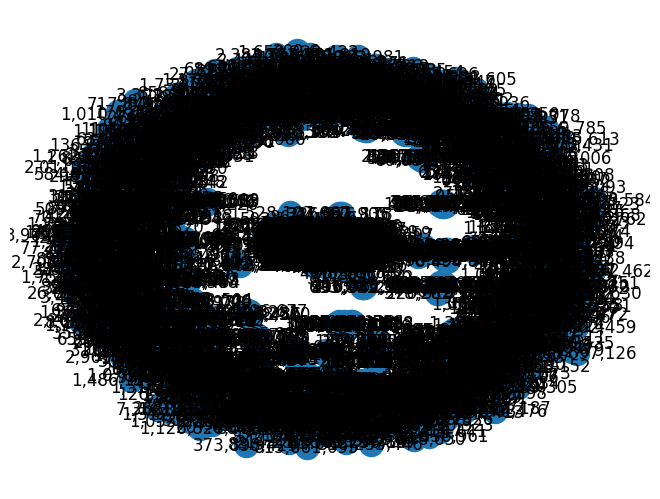

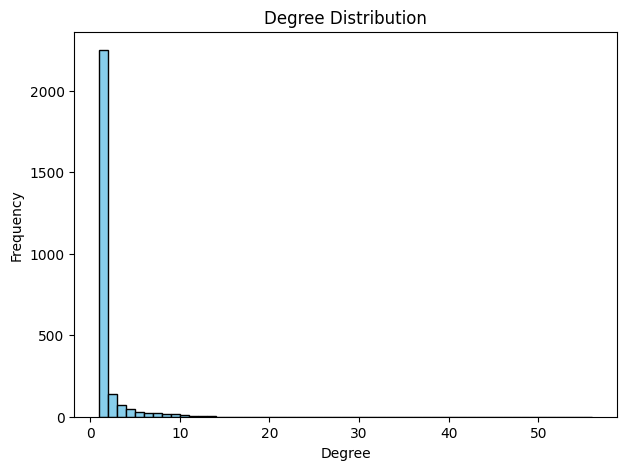

In [6]:
G = nx.from_pandas_edgelist(df_new, 'Spotify Streams', 'Track Score')
print('Number of nodes:', G.number_of_nodes())
print('Number of edges:', G.number_of_edges())
nx.draw(G, with_labels=True, font_weight='normal')
plt.show()

#Displaying degree distribution
degree_sequence = [d for n, d in G.degree()]
plt.figure(figsize=(7,5))
plt.hist(degree_sequence, bins=range(min(degree_sequence),max(degree_sequence)+2),color='skyblue',edgecolor='black')
plt.title('Degree Distribution')
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.show()

#Functions

In [7]:
#finding avg. clustering coefficient n
clustering_coefficients = nx.clustering(G)
average_clustering_coefficient = sum(clustering_coefficients.values()) / len(clustering_coefficients)
print(f"Average Clustering Coefficient: {average_clustering_coefficient}")

Average Clustering Coefficient: 0.0


In [8]:
# Density Analysis
density = nx.density(G)
print(f"Graph Density: {density}")

Graph Density: 0.0005709656263261448


In [9]:
# Centrality Analysis
degree_centrality = nx.degree_centrality(G)
closeness_centrality = nx.closeness_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)

print("Top 5 nodes by Degree Centrality:", sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)[:5])
print("Top 5 nodes by Closeness Centrality:", sorted(closeness_centrality.items(), key=lambda x: x[1], reverse=True)[:5])
print("Top 5 nodes by Betweenness Centrality:", sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)[:5])


Top 5 nodes by Degree Centrality: [(nan, 0.020793950850661626), (33.6, 0.005293005671077505), (37.8, 0.004914933837429112), (33.7, 0.004914933837429112), (36.7, 0.004536862003780719)]
Top 5 nodes by Closeness Centrality: [(nan, 0.05759816644955288), (33.6, 0.03965438570070287), (43.4, 0.03918841172067111), (34.2, 0.03918841172067111), (32.5, 0.03909652798861795)]
Top 5 nodes by Betweenness Centrality: [(nan, 0.012296915082549497), (33.6, 0.001397321466872957), (43.4, 0.0009909371434127703), (32.5, 0.0009154371705813212), (34.2, 0.0008733974129819915)]


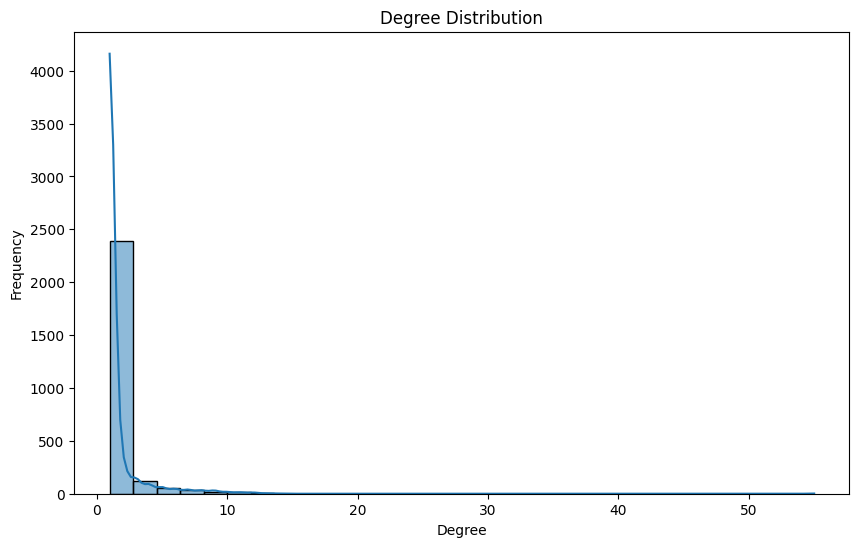

In [10]:
#graph display of degree distribution
degree_sequence = sorted([d for n, d in G.degree()], reverse=True)
plt.figure(figsize=(10, 6))
sns.histplot(degree_sequence, bins=30, kde=True)
plt.title("Degree Distribution")
plt.xlabel("Degree")
plt.ylabel("Frequency")
plt.show()


## Create and Visualize ER, WS, and BA Networks

In [11]:
# Set parameters for the graphs
num_nodes = 1000
num_edges = 3000  # For ER model
k_neighbors = 10  # For WS model
rewire_prob = 0.1  # For WS model
ba_edges = 5  # For BA model

# Create ER, WS, BA Networks
G_er = nx.gnm_random_graph(num_nodes, num_edges)

G_ws = nx.watts_strogatz_graph(num_nodes, k_neighbors, rewire_prob)

G_ba = nx.barabasi_albert_graph(num_nodes, ba_edges)

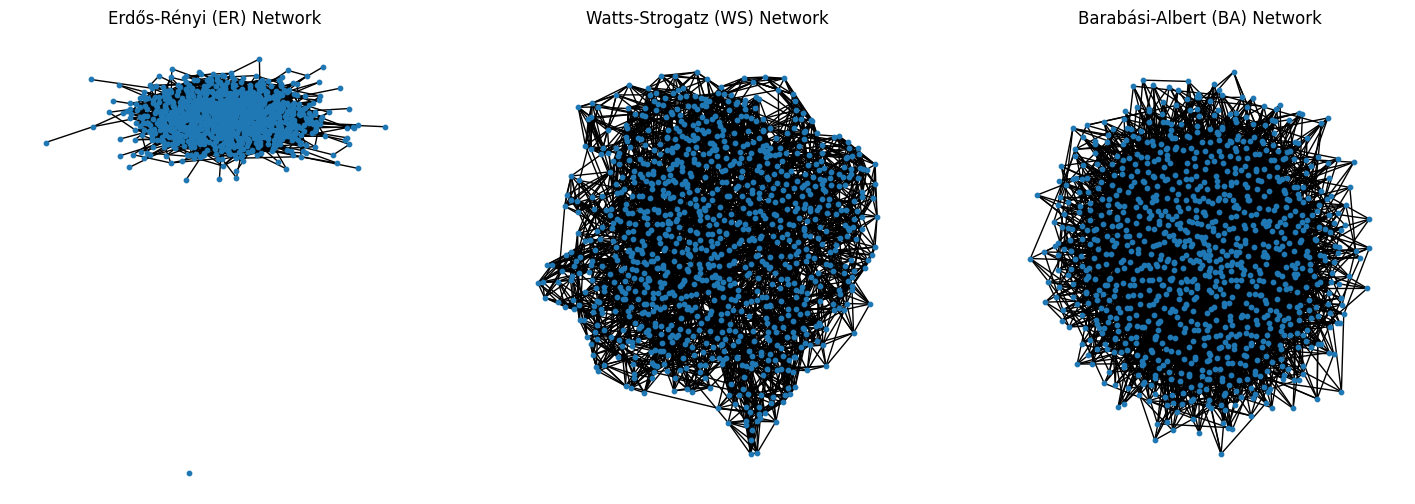

In [12]:
# Visualize the networks
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
nx.draw(G_er, node_size=10, font_size=8)
plt.title("Erdős-Rényi (ER) Network")

plt.subplot(1, 3, 2)
nx.draw(G_ws, node_size=10, font_size=8)
plt.title("Watts-Strogatz (WS) Network")

plt.subplot(1, 3, 3)
nx.draw(G_ba, node_size=10, font_size=8)
plt.title("Barabási-Albert (BA) Network")

plt.show()

### Compare Structural Properties
We can calculate and compare the degree distribution, clustering coefficient, and centrality measures for these networks.

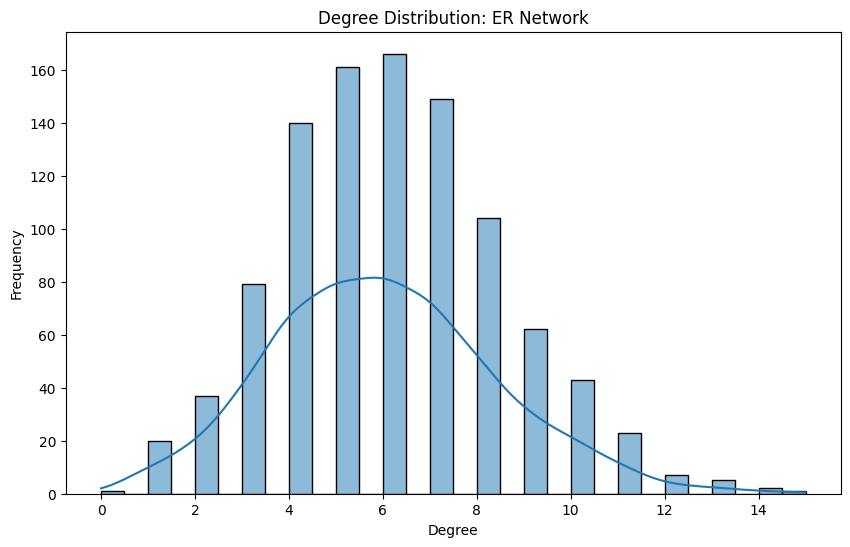

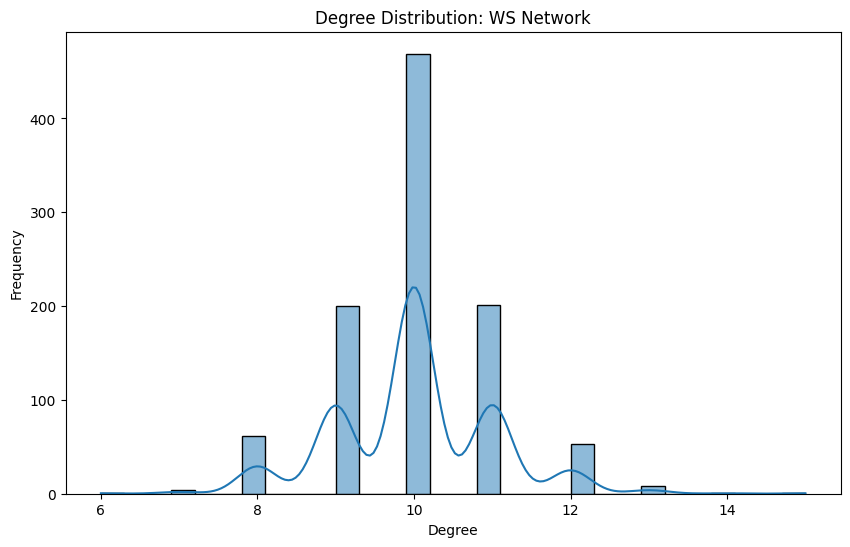

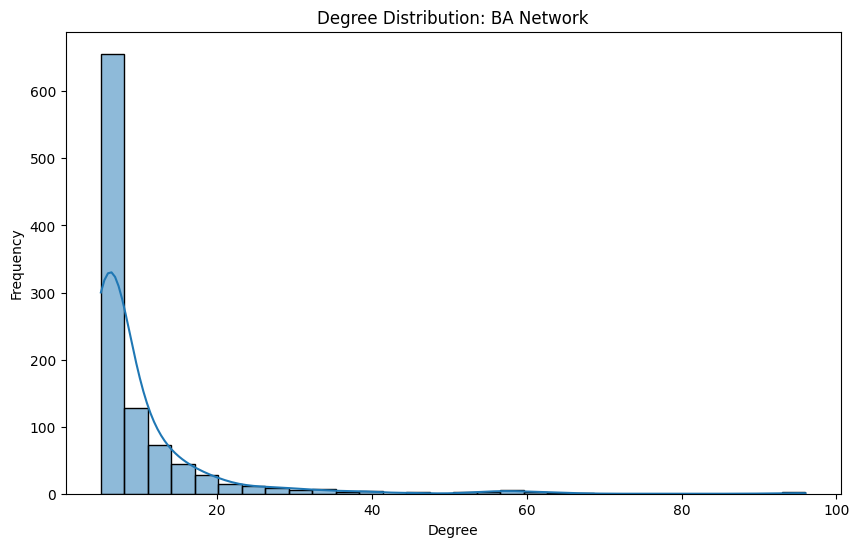

ER Network - Average Clustering Coefficient: 0.006130014430014424
ER Network - Graph Density: 0.006006006006006006
ER Network - Top 5 nodes by Degree Centrality:
Top 5 nodes by Degree Centrality in ER Network: [(430, 0.015015015015015015), (402, 0.014014014014014014), (814, 0.014014014014014014), (17, 0.013013013013013013), (148, 0.013013013013013013)]
Top 5 nodes by Closeness Centrality in ER Network: [(814, 0.2846947461453458), (485, 0.2837225387026184), (982, 0.2835611493176909), (136, 0.2832389207389207), (430, 0.28227661409994365)]
Top 5 nodes by Betweenness Centrality in ER Network: [(430, 0.01642361639790225), (982, 0.01439946053537585), (814, 0.014343710629127635), (402, 0.013440773312663185), (17, 0.013228963612797328)]
WS Network - Average Clustering Coefficient: 0.48071198801198806
WS Network - Graph Density: 0.01001001001001001
WS Network - Top 5 nodes by Degree Centrality:
Top 5 nodes by Degree Centrality in WS Network: [(842, 0.015015015015015015), (66, 0.0140140140140140

In [14]:
def plot_degree_distribution(G, title):
    """

    Args:
      G:
      title:
    """
    degree_sequence = sorted([d for n, d in G.degree()], reverse=True)
    plt.figure(figsize=(10, 6))
    sns.histplot(degree_sequence, bins=30, kde=True)
    plt.title(f"Degree Distribution: {title}")
    plt.xlabel("Degree")
    plt.ylabel("Frequency")
    plt.show()

def calculate_properties(G, title):
    # Degree Distribution
    degree_sequence = sorted([d for n, d in G.degree()], reverse=True)
    clustering_coefficients = nx.clustering(G)
    average_clustering_coefficient = sum(clustering_coefficients.values()) / len(clustering_coefficients)
    print(f"{title} - Average Clustering Coefficient: {average_clustering_coefficient}")

    density = nx.density(G)
    print(f"{title} - Graph Density: {density}")

    # Centrality Measures
    degree_centrality = nx.degree_centrality(G)
    closeness_centrality = nx.closeness_centrality(G)
    betweenness_centrality = nx.betweenness_centrality(G)

    print(f"{title} - Top 5 nodes by Degree Centrality:")
    print(f"Top 5 nodes by Degree Centrality in {title}:",
          sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)[:5])
    print(f"Top 5 nodes by Closeness Centrality in {title}:",
          sorted(closeness_centrality.items(), key=lambda x: x[1], reverse=True)[:5])
    print(f"Top 5 nodes by Betweenness Centrality in {title}:",
          sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)[:5])

# Plot and calculate properties for each network
plot_degree_distribution(G_er, "ER Network")
plot_degree_distribution(G_ws, "WS Network")
plot_degree_distribution(G_ba, "BA Network")

calculate_properties(G_er, "ER Network")
calculate_properties(G_ws, "WS Network")
calculate_properties(G_ba, "BA Network")
